Make sure you installed ***gensim***, ***sklearn***, ***matplotlib*** and ***numpy*** if you use your local machine

In [2]:
# !pip install gensim

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import pandas as pd
import matplotlib.cm as cm
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score
pd.set_option('display.max_colwidth', -1)

/var/folders/lt/pk2vrft51kb9mjtt4ws02p8h0000gn/T/ipykernel_8744/498435771.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [41]:
categories = ['soc.religion.christian', 'sci.space', 'rec.sport.hockey', 'comp.os.ms-windows.misc', 'talk.politics.guns']
# categories = ['alt.atheism', 'soc.religion.christian']
# categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
# categories = ['rec.sport.baseball', 'rec.sport.hockey']
# 'alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
# 'comp.sys.mac.hardware','comp.windows.x', 'misc.forsale', 'rec.autos',  
# 'rec.motorcycles',  'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
# 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns',
# 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'
# categories = ['comp.os.ms-windows.misc', 'talk.politics.guns', 'rec.sport.hockey']

train = sklearn.datasets.fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'),)
test = sklearn.datasets.fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'),)
print('train data size:', len(train.data))
print('test data size:', len(test.data))

train data size: 2929
test data size: 1949


In [42]:
features = CountVectorizer()
train.vecs = features.fit_transform(train.data)
test.vecs = features.transform(test.data)

In [43]:
num_neighs = 10
metric = 'cosine'
nbrs_vecs = NearestNeighbors(n_neighbors=num_neighs, algorithm='brute', metric=metric).fit(train.vecs)

In [44]:
len(features.get_feature_names_out())

61744

In [45]:
idx = 120
inst = test.data[idx]
test.target_names[test.target[idx]]
pd.DataFrame.from_dict({'category':[test.target_names[test.target[idx]]], 'email':[inst]})

,category,email
0,talk.politics.guns,"\nI tend to agree, but I would like a better explanation of why the FBI stopped \nthe firetrucks at the gate. I saw this in realtime. It concerns me that the \nFBI ""appeared"" to not be too interested in stopping the fire after it started, \nand actually started flying hueys around the compound, which had to add in some \nsmall part to the winds driving the fire.\n\nJim\n--\njmd@handheld.com"


(array([5., 0., 0., 0., 0., 2., 0., 0., 0., 3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

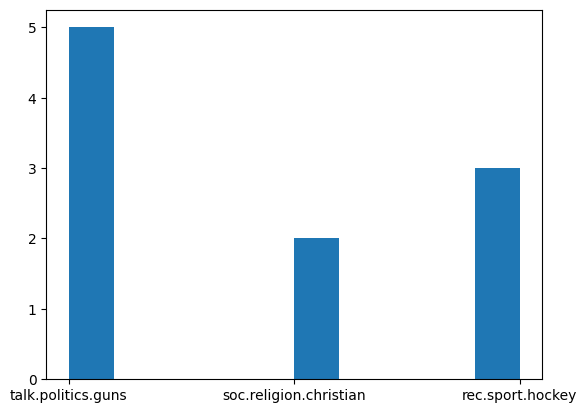

In [46]:
distances, indices = nbrs_vecs.kneighbors(test.vecs[idx])
plt.hist([train.target_names[nidx] for nidx in train.target[indices][0]])

In [47]:
# with reduced dimensions the accuracy of the model has gone up
nbrs_vecs_classifier = KNeighborsClassifier(num_neighs).fit(train.vecs, train.target)
print('vec', accuracy_score(test.target, nbrs_vecs_classifier.predict(test.vecs)))

vec 0.4289379168804515


# Latent Semantic Analysis (LSA)

In [50]:
def do_plot(X_fit, labels=train.target):
  dimension = X_fit.shape[1]
  label_types = list(set(labels))
  num_labels = len(list(set(labels)))
  colors = cm.brg(np.linspace(0, 1, num_labels))
  if num_labels == X_fit.shape[0]:
    label_types = sorted(label_types, key=lambda k: np.where(labels==k))
    colors = cm.seismic(np.linspace(0, 1, num_labels))
  if dimension == 2:
    for lab, col in zip(label_types, colors):
      plt.scatter(X_fit[labels==lab, 0],
                  X_fit[labels==lab, 1],
                  label=lab,
                  c=col, alpha=0.5)
  else:
    raise Exception('Unknown dimension: %d' % dimension)
  plt.legend(loc='best')
  plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

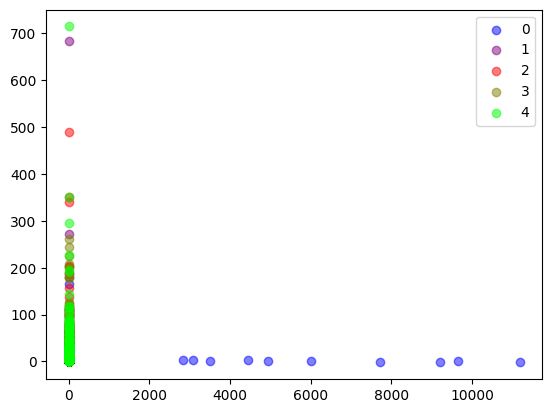

In [51]:
factors = TruncatedSVD(2).fit_transform(train.vecs.toarray())
do_plot(factors)

In [ ]:
svd = TruncatedSVD(50)
train.svd = svd.fit_transform(train.vecs.toarray())
test.svd = svd.transform(test.vecs.toarray())
train.svd.shape, test.svd.shape

In [ ]:
num_neighs = 10
metric = 'cosine'
nbrs_svd = NearestNeighbors(n_neighbors=num_neighs, algorithm='brute', metric=metric).fit(train.svd)

In [ ]:
distances, indices = nbrs_svd.kneighbors(test.svd[idx].reshape(1, -1))
plt.hist([train.target_names[nidx] for nidx in train.target[indices][0]])

In [ ]:
nbrs_svd_classifier = KNeighborsClassifier(num_neighs).fit(train.svd, train.target)
print('svd', accuracy_score(test.target, nbrs_svd_classifier.predict(test.svd)))

# Word Embeddings word2vec

## Dry run on predefined corpus

In [ ]:
import gensim.utils
import gensim.downloader as api

In [ ]:
corpus = api.load('text8')
from gensim.models.word2vec import Word2Vec
model = Word2Vec(corpus)

In [ ]:
model.most_similar(['tree'])

In [ ]:
model.wv.most_similar(['london'])

In [ ]:
model.wv.most_similar_cosmul(positive=['kabul', 'britain'], negative=['london'], topn=1)

In [ ]:
model.most_similar_cosmul(positive=['woman', 'king'], negative=['man'], topn=5)

In [ ]:
del model

## Training on newsgroup data

In [ ]:
train.toks = []
for s in train.data:
  train.toks.append(gensim.utils.simple_preprocess(s))
test.toks = []
for s in test.data:
  test.toks.append(gensim.utils.simple_preprocess(s))

In [ ]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(train.toks, size=100, window=5, min_count=5, workers=4)
word_vectors = model.wv
del model

In [ ]:
word_vectors.most_similar_cosmul(['puck']) #

In [ ]:
words = np.array(['god', 'jesus', 'christ', 'faith', 'bible', 'hockey', 'league', 'draft', 'pick', 'kings'])
factors = TruncatedSVD(2).fit_transform(word_vectors[words])
# do_plot(, words)
factors.shape

In [ ]:
do_plot(factors, words)

In [ ]:
train.w2v = np.zeros((len(train.data), word_vectors['good'].shape[0]))
idx = 0
for s in train.toks:
  ws = []
  for w in s:
    if w in word_vectors:
      ws.append(w)
  if len(ws) is not 0:
    train.w2v[idx] = np.mean(word_vectors[ws], axis=0)
  idx += 1
test.w2v = np.zeros((len(test.data), word_vectors['good'].shape[0]))
idx = 0
for s in test.toks:
  ws = []
  for w in s:
    if w in word_vectors:
      ws.append(w)
  if len(ws) is not 0:
    test.w2v[idx] = np.mean(word_vectors[ws], axis=0)
  idx += 1

# Nearest Neighbors

In [ ]:
# with factors first
num_neighs = 10
metric = 'cosine'
nbrs_vecs = NearestNeighbors(n_neighbors=num_neighs, algorithm='brute', metric=metric).fit(train.vecs)
nbrs_svd = NearestNeighbors(n_neighbors=num_neighs, algorithm='brute', metric=metric).fit(train.svd)
nbrs_w2v = NearestNeighbors(n_neighbors=num_neighs, algorithm='brute', metric=metric).fit(train.w2v)

In [ ]:
idx = 120
inst = test.data[idx]
test.target_names[test.target[idx]]
pd.DataFrame.from_dict({'category':[test.target_names[test.target[idx]]], 'email':[inst]})

In [ ]:
distances, indices = nbrs_vecs.kneighbors(test.vecs[idx])
plt.hist([train.target_names[nidx] for nidx in train.target[indices][0]])

In [ ]:
distances, indices = nbrs_svd.kneighbors(test.svd[idx].reshape(1, -1))
plt.hist([train.target_names[nidx] for nidx in train.target[indices][0]])

In [ ]:
distances, indices = nbrs_w2v.kneighbors(test.w2v[idx].reshape(1, -1))
plt.hist([train.target_names[nidx] for nidx in train.target[indices][0]])

In [ ]:
nbrs_vecs_classifier = KNeighborsClassifier(num_neighs).fit(train.vecs, train.target)
nbrs_svd_classifier = KNeighborsClassifier(num_neighs).fit(train.svd, train.target)
nbrs_w2v_classifier = KNeighborsClassifier(num_neighs).fit(train.w2v, train.target)

In [ ]:
print('vecs', accuracy_score(test.target, nbrs_vecs_classifier.predict(test.vecs)))
print('svd', accuracy_score(test.target, nbrs_svd_classifier.predict(test.svd)))
print('w2v', accuracy_score(test.target, nbrs_w2v_classifier.predict(test.w2v)))